In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
from prng.tests import Tester
from prng.generators.BBS import BlumBlumShubGenerator as BBS
from prng.generators.GLCG import GeneralizedLinearCongruentialGenerator as GLCG
from prng.generators.LCG import LinearCongruentialGenerator as LCG
from prng.generators.RC4 import RivestCipher4Generator as RC4

In [3]:
modulus = 2**14
BBS_gen = BBS()
GLCG_gen = GLCG(modulus, np.array([3, 7, 68]), np.array([128, 1011, 315]))
LCG_gen = LCG(modulus, 3, 7)
RC4_gen = RC4(modulus)

In [4]:
n = 2**15
data_BBS = BBS_gen.sample(n)
data_GLCG = GLCG_gen.sample(n)
data_LCG = LCG_gen.sample(n)
data_RC4 = RC4_gen.sample(n)

In [5]:
def plot_data(data, gen_name, slice = 256):
    plt.scatter(np.arange(slice), data[:slice] / modulus)
    plt.title(f"{gen_name} generator - example sequence")
    plt.xlabel("order")
    plt.ylabel("U_i")
    plt.savefig(f"report/{gen_name}_data.png")
    plt.show()

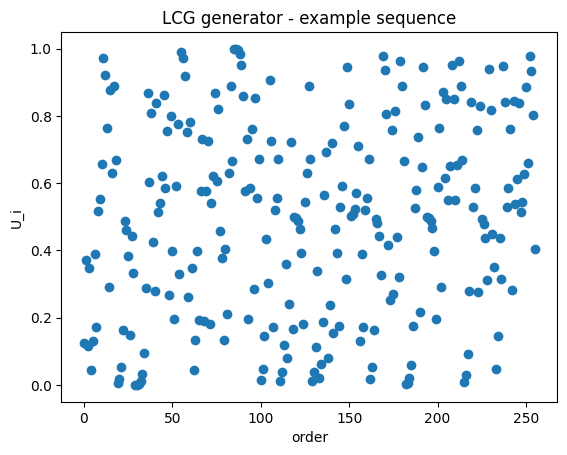

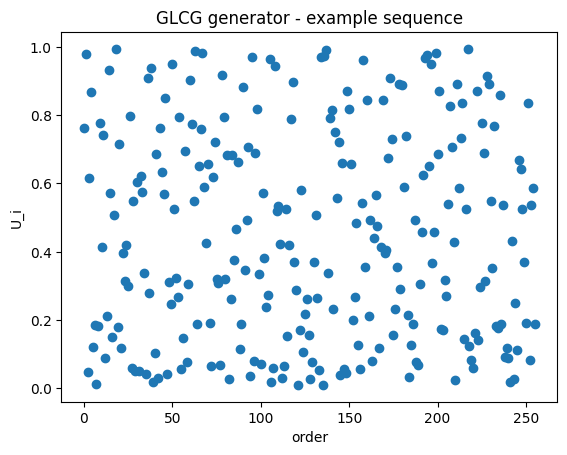

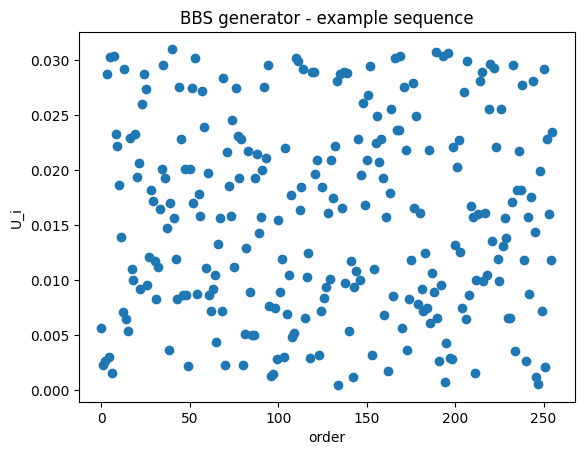

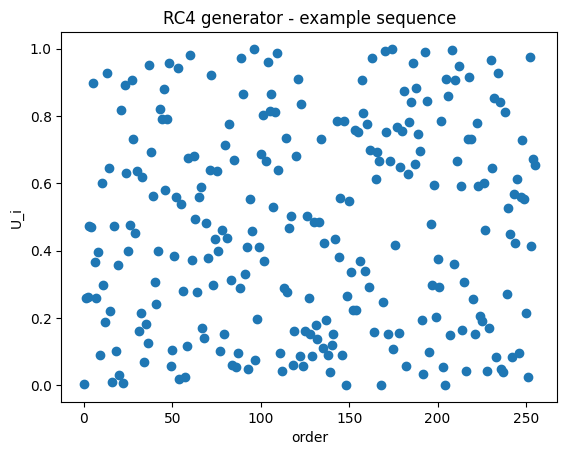

In [6]:
plot_data(data_LCG, "LCG")
plot_data(data_GLCG, "GLCG")
plot_data(data_BBS, "BBS")
plot_data(data_RC4, "RC4")

In [7]:
test_LCG = Tester(data_LCG, no_folds=1000)
test_GLCG = Tester(data_GLCG, no_folds=1000)
test_BBS = Tester(data_BBS, no_folds=1000)
test_RC4 = Tester(data_RC4, no_folds=1000)

In [8]:
def run_all_tests(test, gen):
    chi2_p, chi2_t, chi2_r = test.chi2_test(k=2**7)
    chi2_p2, chi2_t2, chi2_r2, chi2_all = test.chi2_2nd_level_test(k=2**7)
    plt.hist(chi2_all, bins=np.arange(10)/10)
    plt.xlabel("p-values")
    plt.xlim([0, 1])
    plt.title(f"p-values. generator: {gen}, test: chi2")
    plt.savefig(f"report/gen_{gen}_test_chi2.png")
    plt.show()

    # bds_p, bds_t, bds_r = test.bds_test(k=2**36)
    # bds_p2, bds_t2, bds_r2, bds_all = test.bds_2nd_level_test(k=2**5, k_loc=2**31)
    # lam = int(test.n ** 3 / (4 * 2**36))
    # plt.hist(bds_all)
    # plt.plot(np.arange(start=bds_all.min(), stop=bds_all.max()), stats.poisson(lam).pmf(np.arange(start=bds_all.min(), stop=bds_all.max())) * bds_all.shape[0])
    # plt.xlabel("statistics")
    # plt.title(f"Poisson statistics. generator: {gen}, test: bisrthday spacong")
    # plt.show()

    ks_p, ks_t, ks_r = test.ks_test()
    ks_p2, ks_t2, ks_r2, ks_all = test.ks_2nd_level_test()
    plt.hist(ks_all, bins=np.arange(10)/10)
    plt.xlabel("p-values")
    plt.xlim([0, 1])
    plt.title(f"p-values. generator: {gen}, test: Kołmogorow-Smirnov")
    plt.savefig(f"report/gen_{gen}_test_ks.png")
    plt.show()

    runs_p, runs_t, runs_r = test.runs_test()
    runs_p2, runs_t2, runs_r2, runs_all = test.runs_2nd_level_test()
    plt.hist(np.nan_to_num(runs_all, -0.1), bins=(np.arange(11) - 1)/10)
    plt.xlabel("p-values")
    plt.xlim([-0.1, 1])
    plt.title(f"p-values. generator: {gen}, test: runs")
    plt.savefig(f"report/gen_{gen}_test_runs.png")
    plt.show()

    freq_monobit_p, freq_monobit_t, freq_monobit_r = test.freq_monobit_test()
    freq_monobit_p2, freq_monobit_t2, freq_monobit_r2, freq_monobit_all = test.freq_monobit_2nd_level_test()
    plt.hist(freq_monobit_all, bins=np.arange(10)/10)
    plt.xlabel("p-values")
    plt.xlim([0, 1])
    plt.title(f"p-values. generator: {gen}, test: Monobit")
    plt.savefig(f"report/gen_{gen}_test_monobit.png")
    plt.show()

    pvals = {'1st_level': {'chi2': chi2_p, 'runs': runs_p, 'freq_mono': freq_monobit_p, 'ks': ks_p},
             '2nd_level': {'chi2': chi2_p2, 'runs': runs_p2, 'freq_mono': freq_monobit_p2, 'ks': ks_p2}}

    print(pd.DataFrame(pvals).transpose().to_latex())

    # return pvals

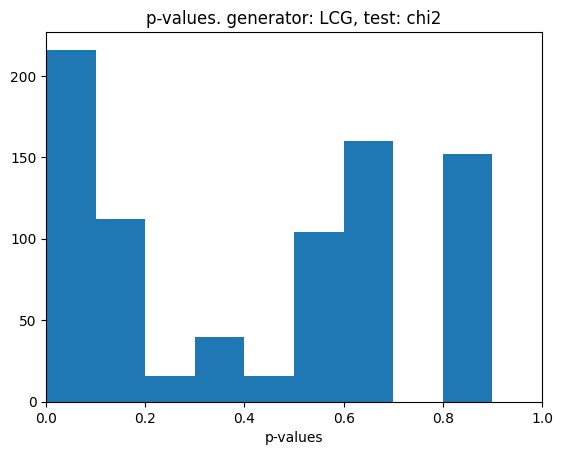

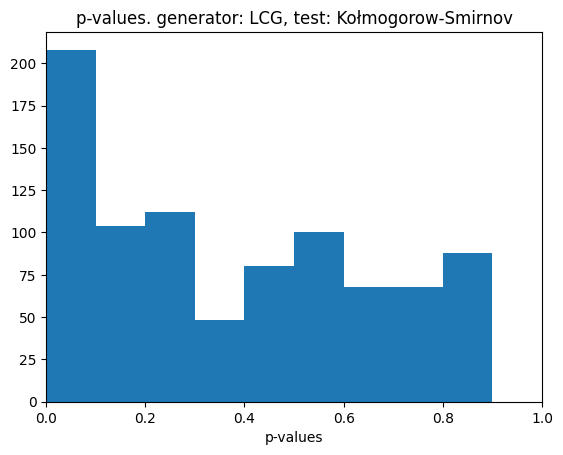

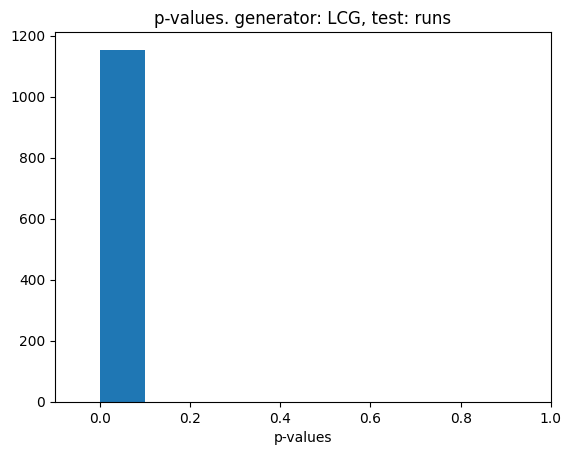

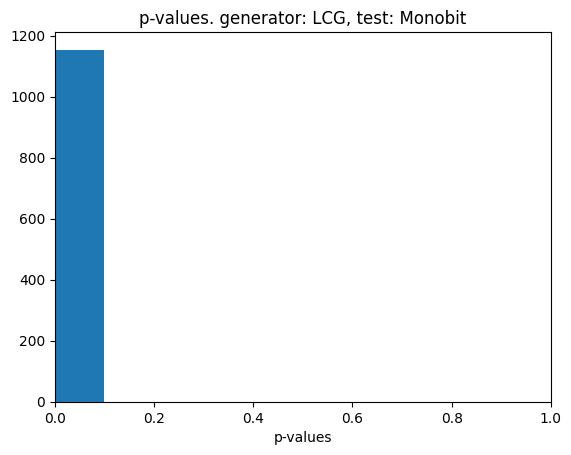

/tmp/ipykernel_8492/2490299358.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(pvals).transpose().to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &  chi2 &  runs &  freq\_mono &            ks \\
\midrule
1st\_level &   1.0 &   0.0 &        0.0 &  1.000000e+00 \\
2nd\_level &   0.0 &   0.0 &        0.0 &  9.074578e-16 \\
\bottomrule
\end{tabular}



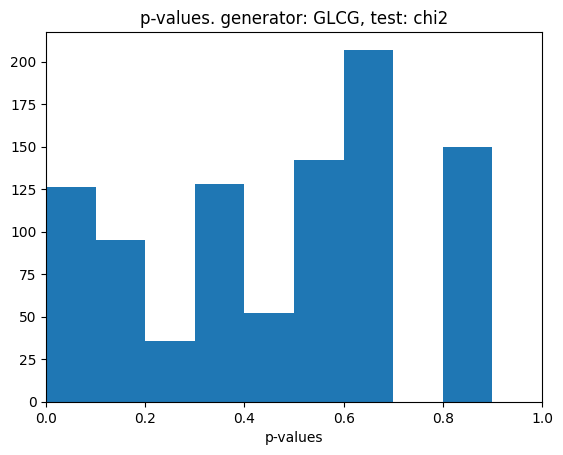

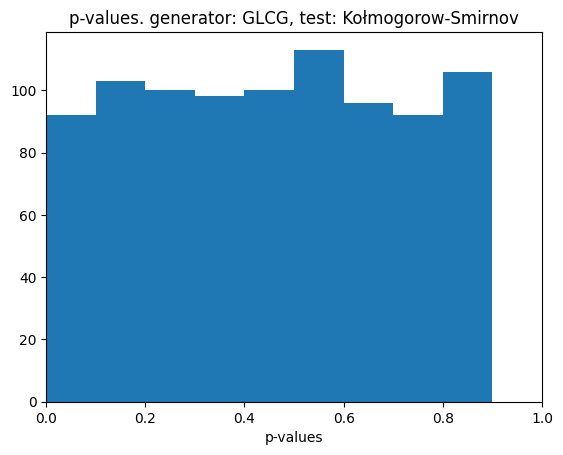

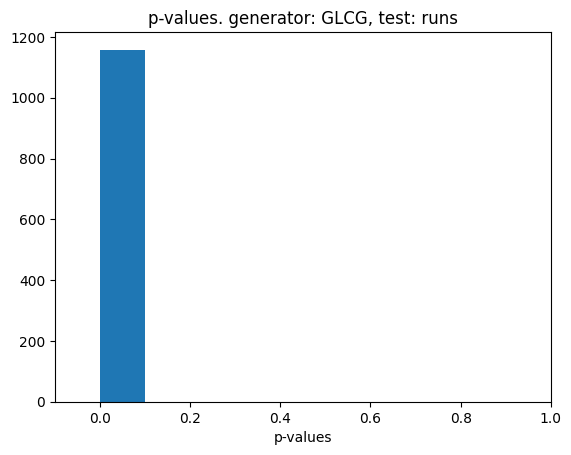

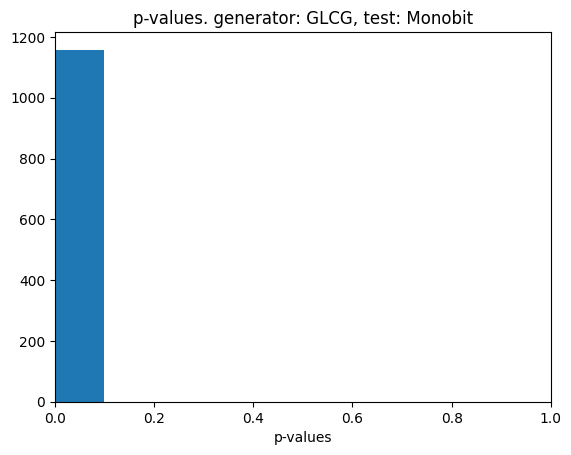

\begin{tabular}{lrrrr}
\toprule
{} &          chi2 &  runs &  freq\_mono &        ks \\
\midrule
1st\_level &  2.411988e-10 &   0.0 &        0.0 &  0.885537 \\
2nd\_level &  0.000000e+00 &   0.0 &        0.0 &  0.914646 \\
\bottomrule
\end{tabular}



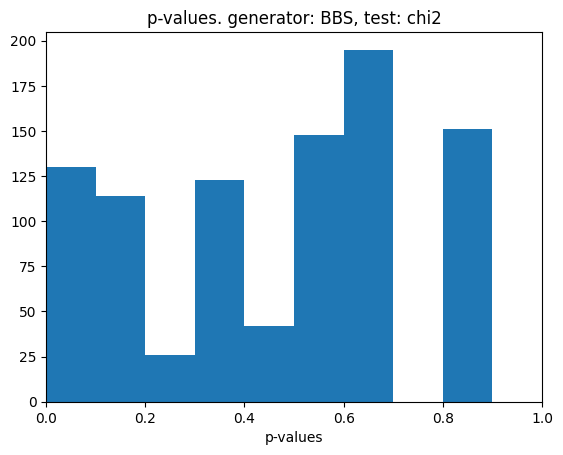

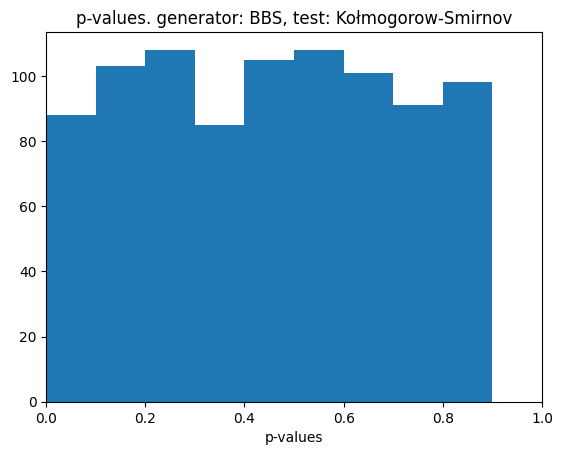

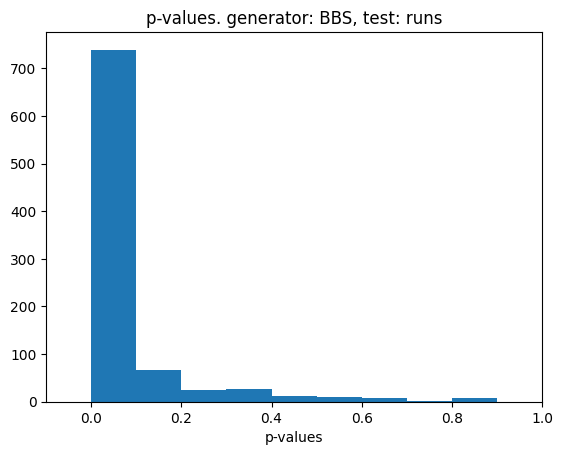

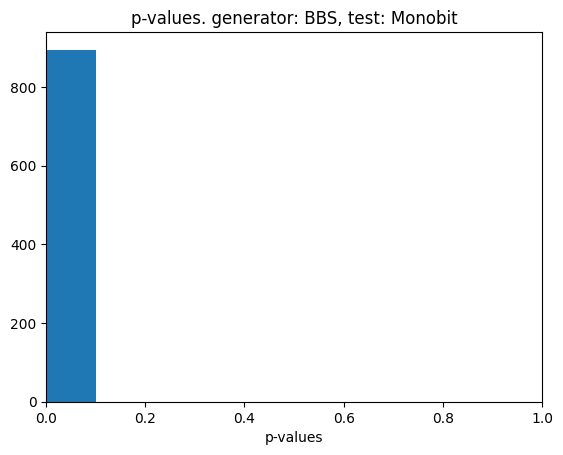

\begin{tabular}{lrrrr}
\toprule
{} &      chi2 &  runs &  freq\_mono &        ks \\
\midrule
1st\_level &  0.777779 &   0.0 &        0.0 &  0.034524 \\
2nd\_level &  0.000000 &   0.0 &        0.0 &  0.666535 \\
\bottomrule
\end{tabular}



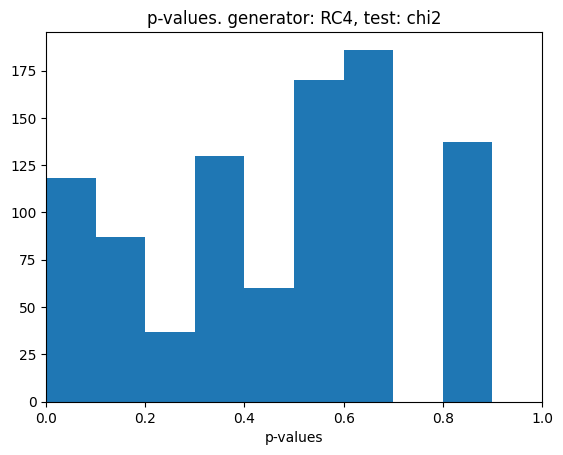

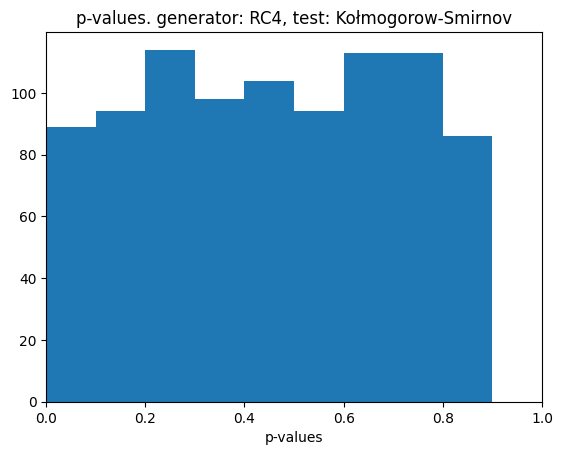

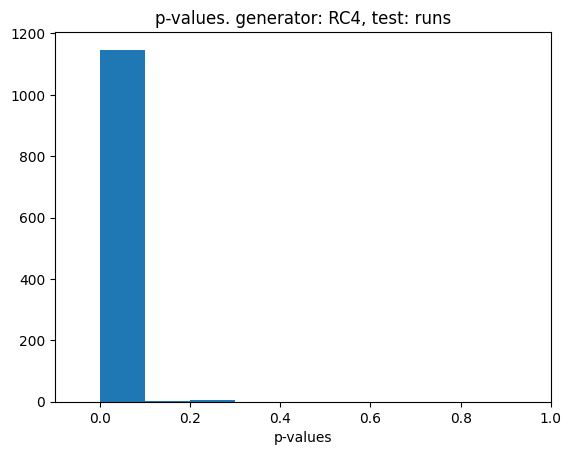

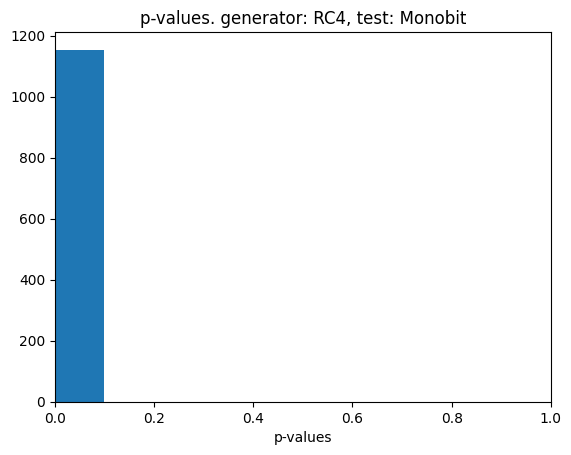

\begin{tabular}{lrrrr}
\toprule
{} &      chi2 &  runs &  freq\_mono &        ks \\
\midrule
1st\_level &  0.751082 &   0.0 &        0.0 &  0.838945 \\
2nd\_level &  0.000000 &   0.0 &        0.0 &  0.779957 \\
\bottomrule
\end{tabular}



In [9]:
run_all_tests(test_LCG, "LCG")
run_all_tests(test_GLCG, "GLCG")
run_all_tests(test_BBS, "BBS")
run_all_tests(test_RC4, "RC4")

In [10]:
with open('data/data.e') as f:
    data_e = np.array([int(x, 2) for x in f.readlines()])
with open('data/data.pi') as f:
    data_pi = np.array([int(x, 2) for x in f.readlines()])
with open('data/data.sqrt2') as f:
    data_sqrt2 = np.array([int(x, 2) for x in f.readlines()])

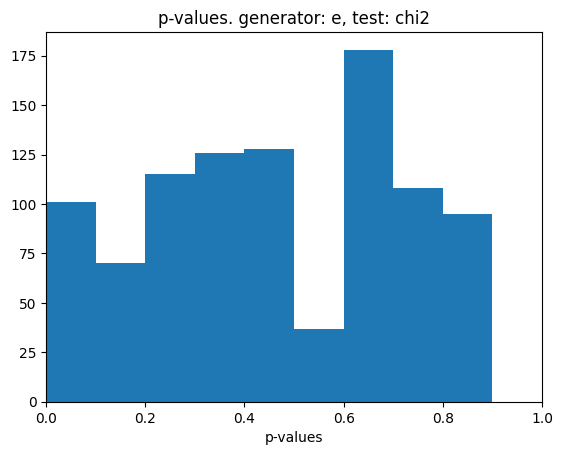

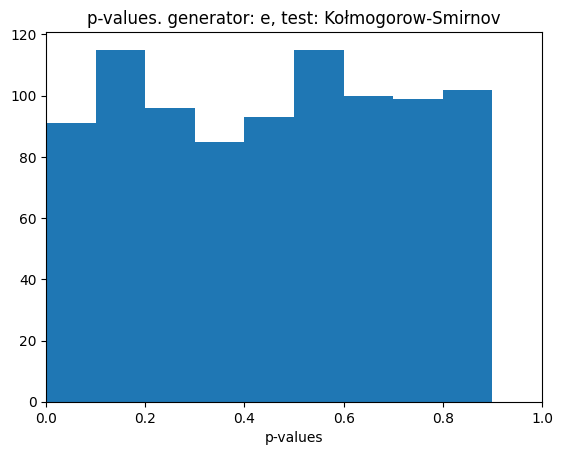

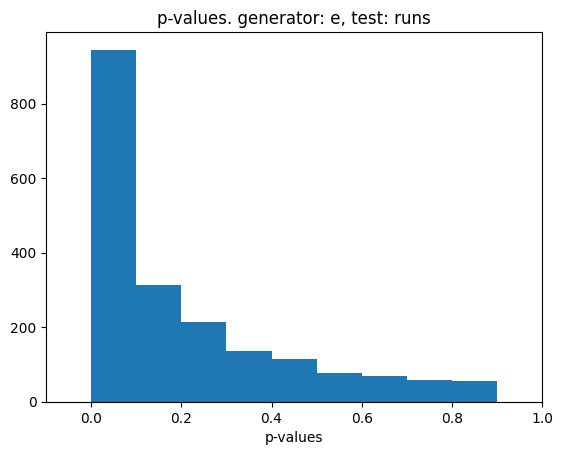

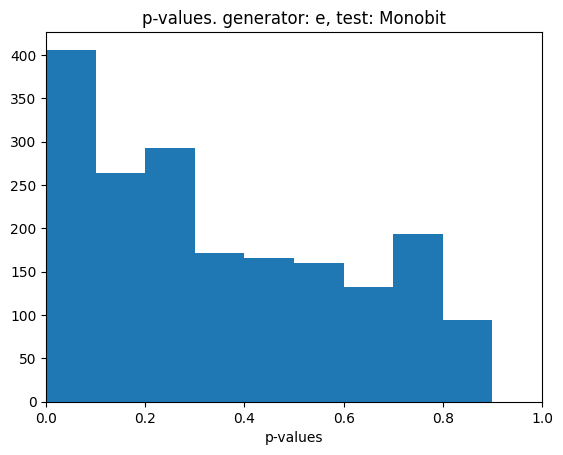

/tmp/ipykernel_8492/2490299358.py:50: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(pvals).transpose().to_latex())


\begin{tabular}{lrrrr}
\toprule
{} &      chi2 &  runs &  freq\_mono &       ks \\
\midrule
1st\_level &  0.216982 &   0.0 &        0.0 &  0.38762 \\
2nd\_level &  0.000000 &   0.0 &        0.0 &  0.76765 \\
\bottomrule
\end{tabular}



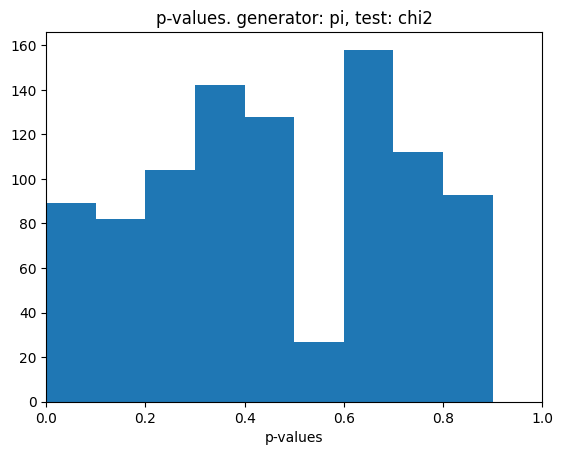

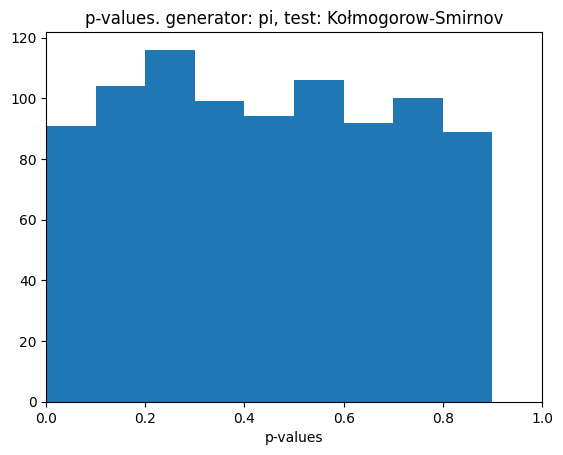

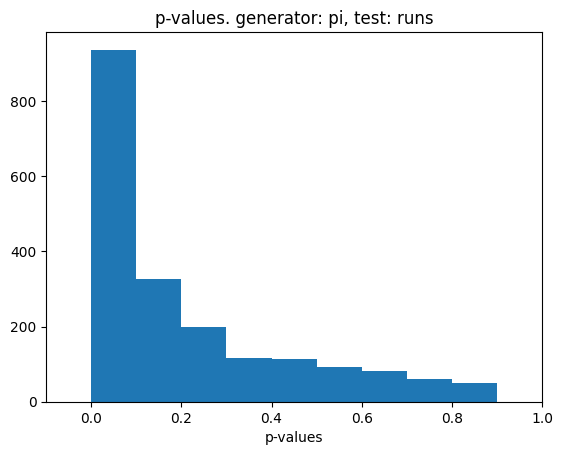

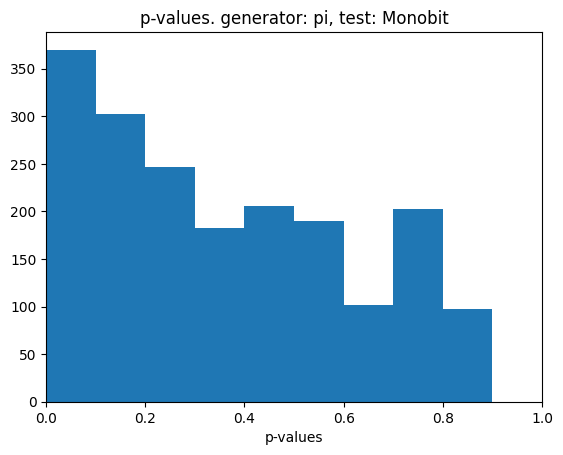

\begin{tabular}{lrrrr}
\toprule
{} &      chi2 &  runs &  freq\_mono &        ks \\
\midrule
1st\_level &  0.630165 &   0.0 &        0.0 &  0.469611 \\
2nd\_level &  0.000000 &   0.0 &        0.0 &  0.975881 \\
\bottomrule
\end{tabular}



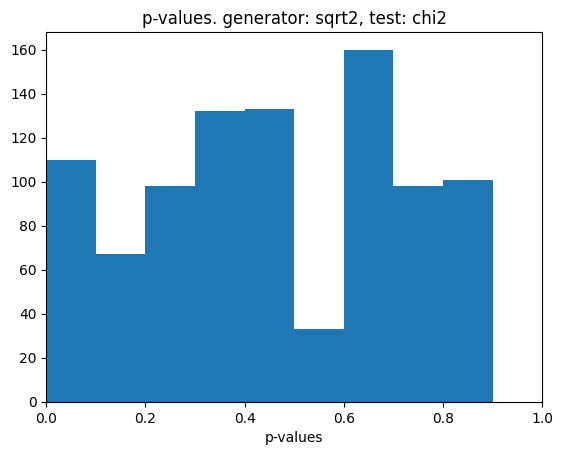

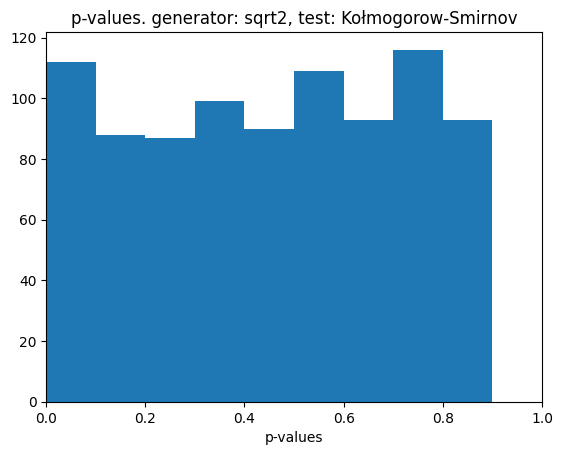

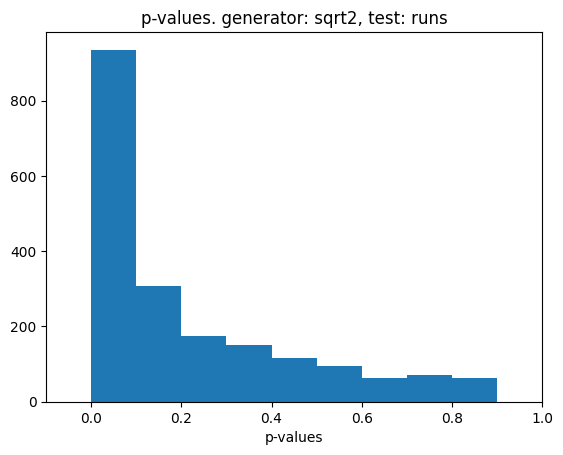

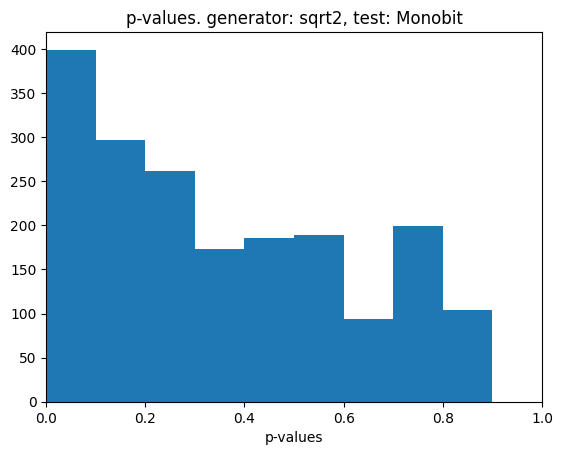

\begin{tabular}{lrrrr}
\toprule
{} &      chi2 &  runs &  freq\_mono &        ks \\
\midrule
1st\_level &  0.642409 &   0.0 &        0.0 &  0.555865 \\
2nd\_level &  0.000000 &   0.0 &        0.0 &  0.238767 \\
\bottomrule
\end{tabular}



In [11]:
test_e = Tester(data_e, no_folds=1000)
test_pi = Tester(data_pi, no_folds=1000)
test_sqrt2 = Tester(data_sqrt2, no_folds=1000)

run_all_tests(test_e, "e")
run_all_tests(test_pi, "pi")
run_all_tests(test_sqrt2, "sqrt2")